### Importe de Cosas necesarias

In [49]:
import os
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt

import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from skimage import io
from skimage.color import rgb2gray,rgb2hed 

### Declaraciones

#### 1. Obtener Imagenes

In [3]:
path_img = '/Users/CamiloCB/Documentos/Universidad/mineria_de_datos/Imagenes_Procesadas/ImagenesResi/'
lista_razas = os.listdir(path_img)
razas = []
lr = []

for raza in lista_razas:
    if raza[0] == 'n':
        aux = []
        lr.append(raza)
        aux_path = path_img + "/" + raza
        aux_lista = os.listdir(aux_path)
        for img in aux_lista:
            if img[0] == 'n':
                aux.append (img)
        razas.append(aux)
    
#Se tiene razas con todos los nombres

#### 2. Matrices con Imagenes -> histograma

In [4]:
#Se realiza de forma inmediata el traspaso por temas de memoria
#Dos matrices: 1 con RGB otra con traspaso a BlancoNegro

path_img = '/Users/CamiloCB/Documentos/Universidad/mineria_de_datos/Imagenes_Procesadas/ImagenesResi/'

his_rgb = []
his_bn = []
his_hed = []
target = []
t = 0

for i in razas:
    target.append(t)
    aux_rgb = []
    aux_bn = []
    for j in i:
        im = io.imread(path_img+lr[t]+'/'+j)
        
        #Leida la imagen, se procede a calcular el histograma RGB
        hist1 = np.histogram(im[:,:,0], range=(0,255), bins= 15)
        hist2 = np.histogram(im[:,:,1], range=(0,255), bins= 15)
        hist3 = np.histogram(im[:,:,2], range=(0,255), bins= 15)
        
        con = np.concatenate((hist1[0],hist2[0],hist3[0]), axis=0)
        aux_rgb.append(con)
        
        #Ahora, se transforma im a BlancoNegro
        im_bn = rgb2gray(im)
        hist_bn = np.histogram(im_bn, range=(0,1), bins=15)
        aux_bn.append(hist_bn[0])
        

    his_rgb.append(aux_rgb)
    his_bn.append(aux_bn)
    t = t + 1


### Elección de Data

In [5]:
#Teniendo los histogramas, se procede a tomar los datos que serán contabilizados

data_rgb = []
data_bn = []
target_train = []
tt = 0

for i in range(0,3):
    for im in his_rgb[i]:
        data_rgb.append(im)
    for im in his_bn[i]:
        data_bn.append(im)

#Se deben dejar claro los targets
for i in range(0,3):
    for im in his_rgb[i]:
        target_train.append(target[tt])
    tt = tt + 1

### Proceso de Entrenamiento

In [6]:
#Se procede a generar el entrenamiento 
kmeans_rgb = KMeans(n_clusters = 3, random_state=0).fit(data_rgb)
kmeans_bn = KMeans(n_clusters = 3, random_state=0).fit(data_bn)


In [44]:
#Se guardan las imagenes para poder ser observadas
rec = 0
if not os.path.exists('RGB_1'):
    os.mkdir('RGB_1')
if not os.path.exists('RGB_1/label0'):
    os.mkdir('RGB_1/label0')
if not os.path.exists('RGB_1/label1'):
    os.mkdir('RGB_1/label1')
if not os.path.exists('RGB_1/label2'):
    os.mkdir('RGB_1/label2')
for i in range(3):
    for j in range(len(razas[i])):
        ims = io.imread('/Users/CamiloCB/Documentos/Universidad/mineria_de_datos/Imagenes_Procesadas/ImagenesResi/'+lr[i]+'/'+razas[i][j])
        if kmeans_rgb.labels_[rec] == 0:
            plt.imsave('RGB_1/label0/'+razas[i][j],ims)
        elif kmeans_rgb.labels_[rec] == 1:
            plt.imsave('RGB_1/label1/'+razas[i][j],ims)
        elif kmeans_rgb.labels_[rec] == 2:
            plt.imsave('RGB_1/label2/'+razas[i][j],ims)
        rec += 1
        

In [45]:
#Se guardan los Obtenidos en BN
rec = 0
if not os.path.exists('BN_1'):
    os.mkdir('BN_1')
if not os.path.exists('BN_1/label0'):
    os.mkdir('BN_1/label0')
if not os.path.exists('BN_1/label1'):
    os.mkdir('BN_1/label1')
if not os.path.exists('BN_1/label2'):
    os.mkdir('BN_1/label2')
for i in range(3):
    for j in range(len(razas[i])):
        ims = io.imread('/Users/CamiloCB/Documentos/Universidad/mineria_de_datos/Imagenes_Procesadas/ImagenesResi/'+lr[i]+'/'+razas[i][j])
        if kmeans_bn.labels_[rec] == 0:
            plt.imsave('BN_1/label0/'+razas[i][j],ims)
        elif kmeans_bn.labels_[rec] == 1:
            plt.imsave('BN_1/label1/'+razas[i][j],ims)
        elif kmeans_bn.labels_[rec] == 2:
            plt.imsave('BN_1/label2/'+razas[i][j],ims)
        rec += 1

In [16]:
# Se procede a obtener los 

170
152
149
471


In [18]:
print(lr[0])
razas[0]

n02113023-Pembroke


['n02113023_6548.jpg',
 'n02113023_2316.jpg',
 'n02113023_1151.jpg',
 'n02113023_5848.jpg',
 'n02113023_1144.jpg',
 'n02113023_11397.jpg',
 'n02113023_5295.jpg',
 'n02113023_5901.jpg',
 'n02113023_7292.jpg',
 'n02113023_6826.jpg',
 'n02113023_2842.jpg',
 'n02113023_5122.jpg',
 'n02113023_209.jpg',
 'n02113023_3022.jpg',
 'n02113023_4611.jpg',
 'n02113023_14398.jpg',
 'n02113023_3181.jpg',
 'n02113023_631.jpg',
 'n02113023_1976.jpg',
 'n02113023_1816.jpg',
 'n02113023_7254.jpg',
 'n02113023_3998.jpg',
 'n02113023_219.jpg',
 'n02113023_231.jpg',
 'n02113023_4211.jpg',
 'n02113023_1354.jpg',
 'n02113023_6177.jpg',
 'n02113023_6567.jpg',
 'n02113023_436.jpg',
 'n02113023_5050.jpg',
 'n02113023_6015.jpg',
 'n02113023_187.jpg',
 'n02113023_7243.jpg',
 'n02113023_4038.jpg',
 'n02113023_6161.jpg',
 'n02113023_7914.jpg',
 'n02113023_1342.jpg',
 'n02113023_597.jpg',
 'n02113023_186.jpg',
 'n02113023_6000.jpg',
 'n02113023_4373.jpg',
 'n02113023_6570.jpg',
 'n02113023_12248.jpg',
 'n02113023_2919

In [11]:
len(kmeans_rgb.labels_)

471

### Funciones Utiles

In [ ]:
def test_acc(train_labels, target_labels):
    for i in range(len(train_labels)):
        
    

In [ ]:
def valPol(resultados):
    for i in range(len(resultados)):
        

In [ ]:
cantidad = 0
for i in range(4):
    cantidad += 1
print(cantidad)

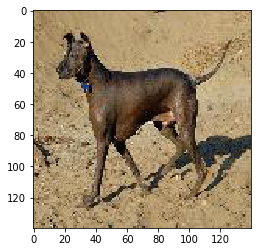

In [21]:
plt.imshow(ims)
plt.show()

In [40]:
if not os.path.exists('test/holo'):
    os.mkdir('test/holo')
plt.imsave('test/test.jpg',ims)

FileNotFoundError: [Errno 2] No such file or directory: 'test/holo'

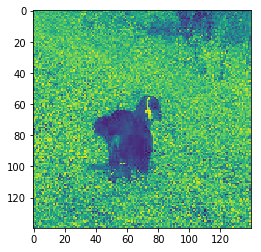

In [62]:
img_test = io.imread('/Users/CamiloCB/Documentos/Universidad/mineria_de_datos/Imagenes_Procesadas/ImagenesResi/n02107683-Bernese_mountain_dog/n02107683_1175.jpg')
img_hed = rgb2hed(img_test)

plt.imshow(img_hed[:,:,1])
plt.show()

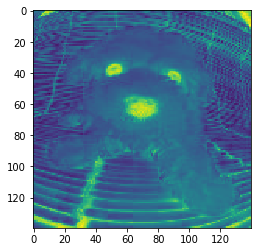

In [71]:
img_test = io.imread('/Users/CamiloCB/Documentos/Universidad/mineria_de_datos/Imagenes_Procesadas/ImagenesResi/n02113624-toy_poodle/n02113624_1008.jpg')
img_hed = rgb2hed(img_test)

plt.imshow(img_hed[:,:,0])
plt.show()

## SOLO VER EL CENTRO DE LA IMAGEN

In [64]:
#Se realiza de forma inmediata el traspaso por temas de memoria
#Dos matrices: 1 con RGB otra con traspaso a BlancoNegro

path_img = '/Users/CamiloCB/Documentos/Universidad/mineria_de_datos/Imagenes_Procesadas/ImagenesResi/'

C1his_rgb = []
C1his_bn = []
C2his_rgb = []
C2his_bn = []
C3his_rgb = []
C3his_bn = []
Ctarget = []
t = 0

for i in razas:
    Ctarget.append(t)
    aux_rgb1 = []
    aux_bn1 = []
    aux_rgb2 = []
    aux_bn2 = []
    aux_rgb3 = []
    aux_bn3 = []
    for j in i:
        im = io.imread(path_img+lr[t]+'/'+j)
        
        #Leida la imagen, se procede a calcular el histograma RGB para 3 tamaños de centro
        hist1 = np.histogram(im[20:120,20:120,0], range=(0,255), bins= 15)
        hist2 = np.histogram(im[20:120,20:120,1], range=(0,255), bins= 15)
        hist3 = np.histogram(im[20:120,20:120,2], range=(0,255), bins= 15) 
        con = np.concatenate((hist1[0],hist2[0],hist3[0]), axis=0)
        aux_rgb1.append(con)
        hist1 = np.histogram(im[30:110,30:110,0], range=(0,255), bins= 15)
        hist2 = np.histogram(im[30:110,30:110,1], range=(0,255), bins= 15)
        hist3 = np.histogram(im[30:110,30:110,2], range=(0,255), bins= 15) 
        con = np.concatenate((hist1[0],hist2[0],hist3[0]), axis=0)
        aux_rgb2.append(con)
        hist1 = np.histogram(im[40:100,40:100,0], range=(0,255), bins= 15)
        hist2 = np.histogram(im[40:100,40:100,1], range=(0,255), bins= 15)
        hist3 = np.histogram(im[40:100,40:100,2], range=(0,255), bins= 15) 
        con = np.concatenate((hist1[0],hist2[0],hist3[0]), axis=0)
        aux_rgb3.append(con)
        #Ahora, se transforma im a BlancoNegro para los tres tamaños de centro
        im_bn = rgb2gray(im)
        hist_bn = np.histogram(im_bn[20:120,20:120], range=(0,1), bins=15)
        aux_bn1.append(hist_bn[0])
        hist_bn = np.histogram(im_bn[30:110,30:110], range=(0,1), bins=15)
        aux_bn2.append(hist_bn[0])
        hist_bn = np.histogram(im_bn[40:100,40:100], range=(0,1), bins=15)
        aux_bn3.append(hist_bn[0])

    C1his_rgb.append(aux_rgb1)
    C1his_bn.append(aux_bn1)
    C2his_rgb.append(aux_rgb2)
    C2his_bn.append(aux_bn2)
    C3his_rgb.append(aux_rgb3)
    C3his_bn.append(aux_bn3)
    t = t + 1



In [67]:
#Teniendo los histogramas, se procede a tomar los datos que serán contabilizados

data_rgb1 = []
data_bn1 = []
data_rgb2 = []
data_bn2 = []
data_rgb3 = []
data_bn3 = []
target_trainC = []
ttC = 0

for i in range(0,3):
    for im in C1his_rgb[i]:
        data_rgb1.append(im)
    for im in C1his_bn[i]:
        data_bn1.append(im)
    for im in C2his_rgb[i]:
        data_rgb2.append(im)
    for im in C2his_bn[i]:
        data_bn2.append(im)
    for im in C3his_rgb[i]:
        data_rgb3.append(im)
    for im in C3his_bn[i]:
        data_bn3.append(im)

#Se deben dejar claro los targets
for i in range(0,3):
    for im in C1his_rgb[i]:
        target_trainC.append(target[ttC])
    ttC = ttC + 1

In [68]:
#Se procede a generar el entrenamiento 

C1kmeans_rgb = KMeans(n_clusters = 3, random_state=0).fit(data_rgb1)
C1kmeans_bn = KMeans(n_clusters = 3, random_state=0).fit(data_bn1)

C2kmeans_rgb = KMeans(n_clusters = 3, random_state=0).fit(data_rgb2)
C2kmeans_bn = KMeans(n_clusters = 3, random_state=0).fit(data_bn2)

C3kmeans_rgb = KMeans(n_clusters = 3, random_state=0).fit(data_rgb3)
C3kmeans_bn = KMeans(n_clusters = 3, random_state=0).fit(data_bn3)



In [69]:
#Se guardan las imagenes para poder ser observadas
rec = 0
if not os.path.exists('RGB_C1'):
    os.mkdir('RGB_C1')
if not os.path.exists('RGB_C1/label0'):
    os.mkdir('RGB_C1/label0')
if not os.path.exists('RGB_C1/label1'):
    os.mkdir('RGB_C1/label1')
if not os.path.exists('RGB_C1/label2'):
    os.mkdir('RGB_C1/label2')
for i in range(3):
    for j in range(len(razas[i])):
        ims = io.imread('/Users/CamiloCB/Documentos/Universidad/mineria_de_datos/Imagenes_Procesadas/ImagenesResi/'+lr[i]+'/'+razas[i][j])
        if C1kmeans_rgb.labels_[rec] == 0:
            plt.imsave('RGB_C1/label0/'+razas[i][j],ims)
        elif C1kmeans_rgb.labels_[rec] == 1:
            plt.imsave('RGB_C1/label1/'+razas[i][j],ims)
        elif C1kmeans_rgb.labels_[rec] == 2:
            plt.imsave('RGB_C1/label2/'+razas[i][j],ims)
        rec += 1
        
rec = 0
if not os.path.exists('RGB_C2'):
    os.mkdir('RGB_C2')
if not os.path.exists('RGB_C2/label0'):
    os.mkdir('RGB_C2/label0')
if not os.path.exists('RGB_C2/label1'):
    os.mkdir('RGB_C2/label1')
if not os.path.exists('RGB_C2/label2'):
    os.mkdir('RGB_C2/label2')
for i in range(3):
    for j in range(len(razas[i])):
        ims = io.imread('/Users/CamiloCB/Documentos/Universidad/mineria_de_datos/Imagenes_Procesadas/ImagenesResi/'+lr[i]+'/'+razas[i][j])
        if C2kmeans_rgb.labels_[rec] == 0:
            plt.imsave('RGB_C2/label0/'+razas[i][j],ims)
        elif C2kmeans_rgb.labels_[rec] == 1:
            plt.imsave('RGB_C2/label1/'+razas[i][j],ims)
        elif C2kmeans_rgb.labels_[rec] == 2:
            plt.imsave('RGB_C2/label2/'+razas[i][j],ims)
        rec += 1
        
rec = 0
if not os.path.exists('RGB_C3'):
    os.mkdir('RGB_C3')
if not os.path.exists('RGB_C3/label0'):
    os.mkdir('RGB_C3/label0')
if not os.path.exists('RGB_C3/label1'):
    os.mkdir('RGB_C3/label1')
if not os.path.exists('RGB_C3/label2'):
    os.mkdir('RGB_C3/label2')
for i in range(3):
    for j in range(len(razas[i])):
        ims = io.imread('/Users/CamiloCB/Documentos/Universidad/mineria_de_datos/Imagenes_Procesadas/ImagenesResi/'+lr[i]+'/'+razas[i][j])
        if C3kmeans_rgb.labels_[rec] == 0:
            plt.imsave('RGB_C3/label0/'+razas[i][j],ims)
        elif C3kmeans_rgb.labels_[rec] == 1:
            plt.imsave('RGB_C3/label1/'+razas[i][j],ims)
        elif C3kmeans_rgb.labels_[rec] == 2:
            plt.imsave('RGB_C3/label2/'+razas[i][j],ims)
        rec += 1

In [70]:
#Se guardan los Obtenidos en BN

rec = 0
if not os.path.exists('BN_C1'):
    os.mkdir('BN_C1')
if not os.path.exists('BN_C1/label0'):
    os.mkdir('BN_C1/label0')
if not os.path.exists('BN_C1/label1'):
    os.mkdir('BN_C1/label1')
if not os.path.exists('BN_C1/label2'):
    os.mkdir('BN_C1/label2')
for i in range(3):
    for j in range(len(razas[i])):
        ims = io.imread('/Users/CamiloCB/Documentos/Universidad/mineria_de_datos/Imagenes_Procesadas/ImagenesResi/'+lr[i]+'/'+razas[i][j])
        if C1kmeans_bn.labels_[rec] == 0:
            plt.imsave('BN_C1/label0/'+razas[i][j],ims)
        elif C1kmeans_bn.labels_[rec] == 1:
            plt.imsave('BN_C1/label1/'+razas[i][j],ims)
        elif C1kmeans_bn.labels_[rec] == 2:
            plt.imsave('BN_C1/label2/'+razas[i][j],ims)
        rec += 1
        
rec = 0
if not os.path.exists('BN_C2'):
    os.mkdir('BN_C2')
if not os.path.exists('BN_C2/label0'):
    os.mkdir('BN_C2/label0')
if not os.path.exists('BN_C2/label1'):
    os.mkdir('BN_C2/label1')
if not os.path.exists('BN_C2/label2'):
    os.mkdir('BN_C2/label2')
for i in range(3):
    for j in range(len(razas[i])):
        ims = io.imread('/Users/CamiloCB/Documentos/Universidad/mineria_de_datos/Imagenes_Procesadas/ImagenesResi/'+lr[i]+'/'+razas[i][j])
        if C2kmeans_bn.labels_[rec] == 0:
            plt.imsave('BN_C2/label0/'+razas[i][j],ims)
        elif C2kmeans_bn.labels_[rec] == 1:
            plt.imsave('BN_C2/label1/'+razas[i][j],ims)
        elif C2kmeans_bn.labels_[rec] == 2:
            plt.imsave('BN_C2/label2/'+razas[i][j],ims)
        rec += 1
        
rec = 0
if not os.path.exists('BN_C3'):
    os.mkdir('BN_C3')
if not os.path.exists('BN_C3/label0'):
    os.mkdir('BN_C3/label0')
if not os.path.exists('BN_C3/label1'):
    os.mkdir('BN_C3/label1')
if not os.path.exists('BN_C3/label2'):
    os.mkdir('BN_C3/label2')
for i in range(3):
    for j in range(len(razas[i])):
        ims = io.imread('/Users/CamiloCB/Documentos/Universidad/mineria_de_datos/Imagenes_Procesadas/ImagenesResi/'+lr[i]+'/'+razas[i][j])
        if C3kmeans_bn.labels_[rec] == 0:
            plt.imsave('BN_C3/label0/'+razas[i][j],ims)
        elif C3kmeans_bn.labels_[rec] == 1:
            plt.imsave('BN_C3/label1/'+razas[i][j],ims)
        elif C3kmeans_bn.labels_[rec] == 2:
            plt.imsave('BN_C3/label2/'+razas[i][j],ims)
        rec += 1